<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Text_recognition_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convulational Neural Network

## Importing libraries

In [1]:
%tensorflow_version 2.x

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

## Constructing hyper parameters

In [3]:
# Input image dimensions
img_rows, img_cols = 28, 28

# The number of training samples per batch. 128 is a reasonable number.
batch_size = 128

# Our data set contains 10 digits, so the number of classes is 10
num_classes = 10

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 20

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.5

## Loading data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Save original test images for display purposes
orig_test = x_test

## Data Preperation

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

## Data training

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Prediction

In [13]:
predictions = model.predict(x_test)
most_likely = predictions.argmax(1)

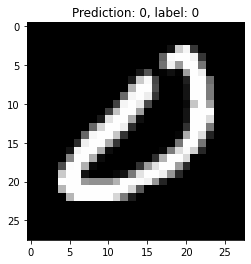

In [25]:
index = random.randrange(10000)
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.imshow(orig_test[index], cmap='gray')
plt.show()

## Error analysis

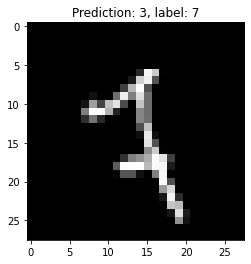

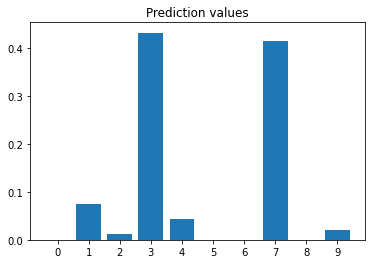

In [27]:
for i in range(10000):
    index = random.randrange(10000)
    if most_likely[index] != y_test[index]:
        break

plt.imshow(orig_test[index], cmap='gray')
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))
plt.title('Prediction values')
plt.show()

## Testing algortihm with your own handwritten digits

In [28]:
from skimage import io,transform

## Read image

Original image shape:(50, 55, 3)


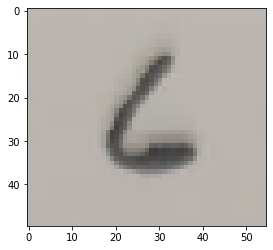

In [50]:
rgb = io.imread('6.png')
print('Original image shape:{}'.format(rgb.shape))
plt.imshow(rgb)

## Transform to grayscale

Grayscale image shape:(50, 55)


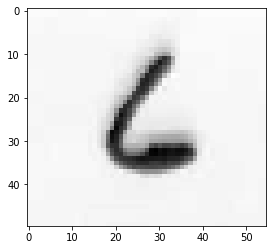

In [51]:
gray = np.dot(rgb[...,:],[0.229,0.587,0.114])
print('Grayscale image shape:{}'.format(gray.shape))
plt.imshow(gray,cmap='gray')

## Shape transform

Shape transformed grayscale image shape:(28, 28)


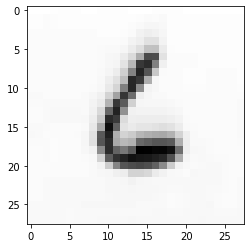

In [52]:
gray28x28 = transform.resize(gray,(img_rows,img_cols))
print('Shape transformed grayscale image shape:{}'.format(gray28x28.shape))
plt.imshow(gray28x28,cmap='gray')


## Filtering background

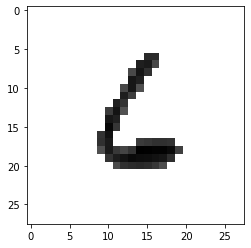

In [53]:
vectorized_filter = np.vectorize(lambda v: 255 if v > 128 else v)
filtered = vectorized_filter(gray28x28)
plt.imshow(filtered,cmap='gray')

## Filter and reshape

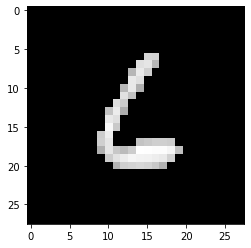

In [54]:
inverted = 255 - filtered
reshaped = inverted.reshape(img_rows,img_cols,1)/255
batch = np.array([reshaped])
plt.imshow(inverted,cmap='gray')

In [55]:
batch.max()

0.7607843137254902

In [56]:
predictions = model.predict(batch)
result = predictions.argmax(1)
print('Tahmin edilen sayı:{}'.format(result[0]))

Tahmin edilen sayı:6


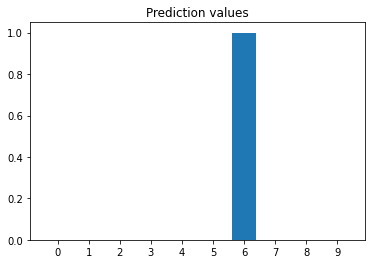

In [57]:
plt.bar(range(10), predictions[0], tick_label=range(10))
plt.title('Prediction values')
plt.show()